In [96]:
import pandas as pd
import arimafd as oa
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [98]:
df_orig = pd.read_csv("data/valve1/0.csv", sep=';', index_col='datetime', parse_dates=True)
df=df_orig
# df = pd.concat(valve1_data)
y_test = df["anomaly"]
df.drop(["anomaly", "changepoint"], inplace=True, axis=1)
df2d = df[["Temperature", "Current"]]
df = df2d
df.Temperature.iloc[900] =100
# df.at['Temperature', 900]=100

df.sort_index(inplace=True)

C:\Users\spish\AppData\Local\Temp\ipykernel_15596\1795867071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Temperature.iloc[900] =100


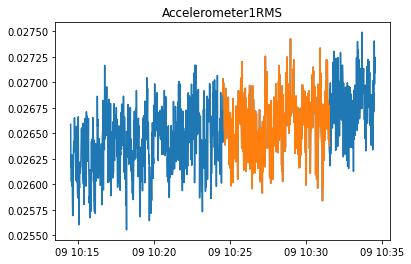

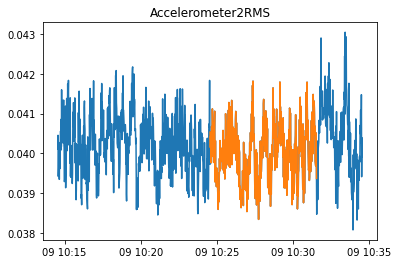

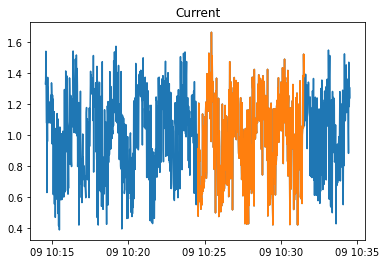

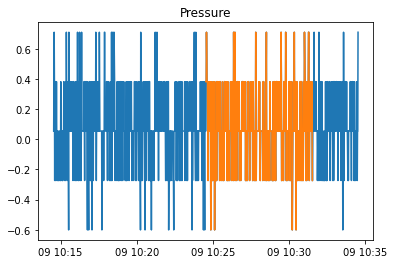

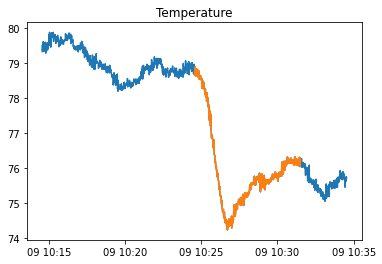

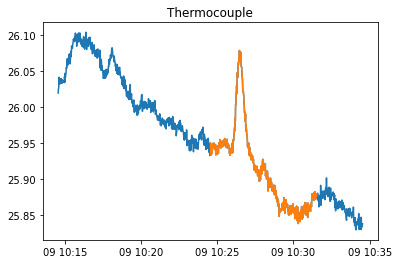

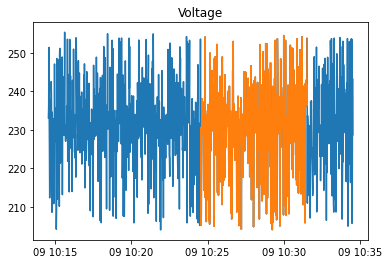

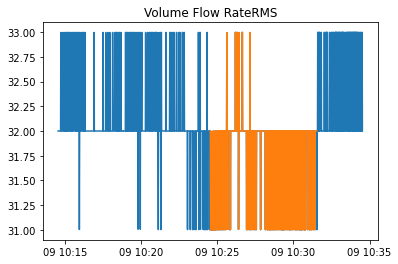

In [157]:
y = y_test
anomalies_indecies = y.index[y == 1]
for c in df_orig.columns:
    plt.plot(df_orig[c])
    plt.plot(anomalies_indecies, df_orig[c][anomalies_indecies])
    plt.title(c)
    plt.show()

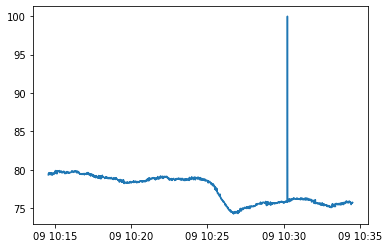

In [99]:
plt.plot(df.Temperature)

### Calculation of Orders

In [112]:
ar_order = 3

### Fit & Predict

In [113]:
ad = oa.Anomaly_detection(df) #init anomaly detection algorithm
ad.generate_tensor(ar_order) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
predicted = ts_anomaly

C:\Python310\lib\site-packages\arimafd\tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
C:\Python310\lib\site-packages\arimafd\tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 34.39199948310852
Time seconds: 35.29323387145996


In [114]:
predicted = ts_anomaly

In [128]:
ts_anomaly

datetime
2020-03-09 10:14:36    0
2020-03-09 10:14:37    0
2020-03-09 10:14:38    0
2020-03-09 10:14:39    0
2020-03-09 10:14:40    0
                      ..
2020-03-09 10:34:28    0
2020-03-09 10:34:29    0
2020-03-09 10:34:30    0
2020-03-09 10:34:31    0
2020-03-09 10:34:32    0
Length: 1144, dtype: int32

In [131]:
df[df.Temperature > 90]

,Temperature,Current
datetime,,
2020-03-09 10:30:15,100.0,1.48926


In [134]:
y_test['2020-03-09 10:30:15']

1.0

In [149]:
j = ts_anomaly.to_frame().join(y_test, how='right')
predicted = j[0].shift(-ar_order, fill_value = 0)

Text(0.5, 1.0, 'Temperature')

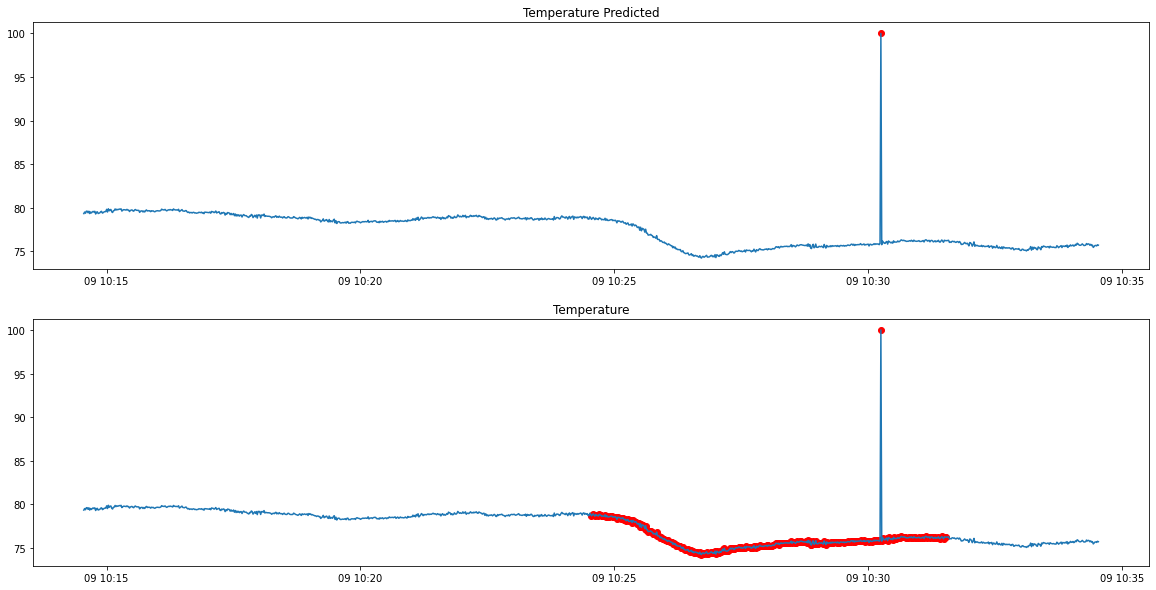

In [150]:
# plt.subplot(2, 1, 1)
fig, axs = plt.subplots(2, 1, figsize=(20,10))
values = df.Temperature
axs[0].plot(values)

y=predicted
anomalies_indecies = y.index[y == 1]
axs[0].scatter(anomalies_indecies, values[anomalies_indecies], color='r')
# #axs.scatter(cpi, temperatures[cpi], color='g', marker='^', s=300)
axs[0].set_title("Temperature Predicted")

y = pd.Series(y_test)
axs[1].plot(values)
anomalies_indecies = y.index[y == 1]
axs[1].scatter(anomalies_indecies, values[anomalies_indecies], color='r')
# #axs.scatter(cpi, temperatures[cpi], color='g', marker='^', s=300)
axs[1].set_title("Temperature")

In [119]:
def mar(test, pred):
    p = pred.values.astype(bool)
    t = test.values.astype(bool)
    fn = (~p & t).sum()
    tp = (p & t).sum()
    return fn / (tp + fn)

def far(test, pred):
    p=pred.values.astype(bool)
    t=test.values.astype(bool)
    fp = (p & ~t).sum()
    tn = (~p & ~t).sum()
    return fp / (fp + tn)

def f1_score(test, pred):
    p=pred.values.astype(bool)
    t=test.values.astype(bool)
    tp = (p & t).sum()
    fp = (p & ~t).sum()
    fn = (~p & t).sum()
    return tp / (tp + 0.5 * (fp + fn))


In [120]:
# predicted = predicted.to_frame().join(y_test, how='right').fillna(0)[0]

In [124]:
ts_anomaly

datetime
2020-03-09 10:14:36    0
2020-03-09 10:14:37    0
2020-03-09 10:14:38    0
2020-03-09 10:14:39    0
2020-03-09 10:14:40    0
                      ..
2020-03-09 10:34:28    0
2020-03-09 10:34:29    0
2020-03-09 10:34:30    0
2020-03-09 10:34:31    0
2020-03-09 10:34:32    0
Length: 1144, dtype: int32

In [121]:
mar(y_test, predicted)

0.9975062344139651

In [122]:
far(y_test, predicted)

0.0

In [123]:
df.iloc[900:915].join(predicted)

,Temperature,Current,0
datetime,,,
2020-03-09 10:30:15,100.0000,1.489260,0.0
2020-03-09 10:30:16,75.7711,1.079000,0.0
2020-03-09 10:30:17,76.1754,1.330510,0.0
2020-03-09 10:30:19,75.9355,1.370120,1.0
2020-03-09 10:30:20,75.9240,1.222780,0.0
2020-03-09 10:30:21,76.0730,0.995007,0.0
2020-03-09 10:30:22,76.1370,1.333950,0.0
2020-03-09 10:30:23,75.8365,1.327590,0.0
2020-03-09 10:30:24,76.1957,1.197800,0.0
